In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('./Datasets/train.csv', usecols=['Ticket', 'Survived', 'Cabin'])

In [53]:
df.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


In [54]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [55]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # extracts numeric part of column
df['cabin_cat'] = df['Cabin'].str.extract('(\w)') # extracts first character 
df.sample(5)

,Survived,Ticket,Cabin,cabin_num,cabin_cat
750,1,29103,NaN,NaN,NaN
454,0,A/5 2817,NaN,NaN,NaN
760,0,358585,NaN,NaN,NaN
725,0,315094,NaN,NaN,NaN
138,0,7534,NaN,NaN,NaN


In [56]:
df.cabin_cat.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_cat, dtype: int64

<AxesSubplot:>

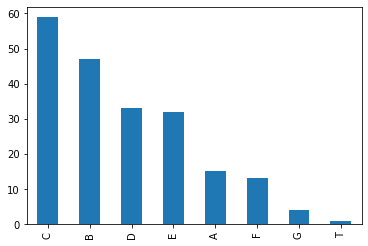

In [57]:
df.cabin_cat.value_counts().plot(kind='bar')

In [61]:
# separating ticket column numerical and categorical data
df['ticket_num'] = pd.to_numeric(df['Ticket'].apply(lambda x : x.split()[-1]),
                                 errors = 'coerce',
                                 downcast='integer')
df['ticket_cat'] = df['Ticket'].apply(lambda x : x.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

In [62]:
df.head()

,Survived,Ticket,Cabin,cabin_num,cabin_cat,ticket_num,ticket_cat
0,0,A/5 21171,NaN,NaN,NaN,21171.0,A/5
1,1,PC 17599,C85,85,C,17599.0,PC
2,1,STON/O2. 3101282,NaN,NaN,NaN,3101282.0,STON/O2.
3,1,113803,C123,123,C,113803.0,NaN
4,0,373450,NaN,NaN,NaN,373450.0,NaN
